# <font color='red'> [0] Build the model </font> 

## <font color='green'> [0.1] Importation of the package </font> 

In [1]:
from main import *

## <font color='green'> [0.2] Creation of an empty model </font> 

In [2]:
momo = model()

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction


## <font color='green'> [0.3] Add of reaction and metabolite </font> 

In [3]:
momo.metabolites.add(name = "H2O", external = True, concentration = 1.0)

metabolite_reaction = {"H2O" : 1.0,
                       "H2"  :-1.0,
                       "O2"  :-0.5}
momo.reactions.add(name = "combustion", metabolites = metabolite_reaction, k_eq = 1.0, law = "", flux=1.0)

Don't worry, the metabolite will be add after the add of the 1st reaction
The metabolite "H2O" is already in the model !
True


In [4]:
metabolite_reaction2 = {"H2O" : -1.0,
                       "H2"  : 0.5,
                       "O2"  : 0.5}
momo.reactions.add(name = "test", metabolites = metabolite_reaction2, k_eq = 1.0, law = "", flux=1.0)

True


In [5]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
combustion,"{'H2O': 1.0, 'H2': -1.0, 'O2': -0.5}",1.0,,1.0
test,"{'H2O': -1.0, 'H2': 0.5, 'O2': 0.5}",1.0,,1.0


#### Add a reaction with specified metabolite and stoichiometric coefficient automaticaly adds them to the model

In [6]:
momo.metabolites.df

,External,Concentration (mmol/gDW)
H2O,True,1.0
H2,False,1.0
O2,False,1.0


In [7]:
momo.Stoichio_matrix

,combustion,test
H2O,1.0,-1.0
H2,-1.0,0.5
O2,-0.5,0.5


In [8]:
momo.elasticity.p

,Temperature
combustion,0
test,0


In [10]:
momo.elasticity.s.df

,H2O,H2,O2
0,NaN,NaN,0


In [19]:
momo.elasticity.s.fill_sub_elasticity()

ValueError: could not broadcast input array from shape (2,3) into shape (0,3)

In [ ]:
momo.elasticity.s.df

In [ ]:
momo.elasticity.s.enzyme

,H2O,H2,O2
combustion,0.921624,-0.193176,-0.059246
test,-0.906697,0.160548,0.016504


#### Print the stoichiometric matrix

In [ ]:
momo.Stoichio_matrix

,combustion,test
H2O,1.0,-1.0
H2,-1.0,0.5
O2,-0.5,0.5


#### It is also possible to remove a metabolite or a reaction to the model

In [ ]:
momo.metabolites.remove("O2")
momo.metabolites.df

,External,Concentration (mmol/gDW)
H2O,True,1.0
H2,False,1.0


#### Removing a metabolite remove also every mention of it in the reactions dataframe and in the stoichiometric matrix

In [ ]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
combustion,"{'H2O': 1.0, 'H2': -1.0}",1.0,,1.0
test,"{'H2O': -1.0, 'H2': 0.5}",1.0,,1.0


In [ ]:
momo.Stoichio_matrix

,combustion,test
H2O,1.0,-1.0
H2,-1.0,0.5


In [ ]:
momo.reactions.remove(name="combustion")
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
test,"{'H2O': -1.0, 'H2': 0.5}",1.0,,1.0


## <font color='green'> [0.4] Stoichiometric matrix from an existant one </font> 

In [ ]:
reactions = {'Combustion': [1. , -1., -0.5],
            'Reaction_2': [0. ,  0.,   0. ]}

metabolites = ['H2O', 'H2', 'O2']

dataframe = pd.DataFrame(reactions, index=metabolites)

momo.Stoichio_matrix = dataframe

#### And the metabolites and reactions dataframes are automatically update

In [ ]:
momo.Stoichio_matrix

,Combustion,Reaction_2
H2O,1.0,0.0
H2,-1.0,0.0
O2,-0.5,0.0


In [ ]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
Combustion,"{'H2O': 1.0, 'H2': -1.0, 'O2': -0.5}",1.0,,1
Reaction_2,{},1.0,,1


In [ ]:
momo.metabolites.df

,External,Concentration (mmol/gDW)
H2O,False,1
H2,False,1
O2,False,1


## <font color='green'> [0.5] Create a linear system </font> 

In [ ]:
momo.creat_linear(4)

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction
Empty DataFrame
Columns: [Temperature]
Index: []


### Display the variables of the system

In [ ]:
momo.metabolites.df

,External,Concentration (mmol/gDW)
meta_0,True,1
meta_1,False,1
meta_2,False,1
meta_3,True,1


In [ ]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
reaction_0,"{'meta_0': -1, 'meta_1': 1}",1.0,,1
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,,1
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,,1


## <font color='green'> [0.6] Read a CSV file </font> 

In [ ]:
momo.read_CSV()

In [ ]:
momo.Stoichio_matrix

,ACALD,ACALDt,ACKr,ACONTa,ACONTb,ACt2r,ADK1,AKGDH,AKGt2r,ALCD2x,...,RPI,SUCCt2_2,SUCCt3,SUCDi,SUCOAS,TALA,THD2,TKT1,TKT2,TPI
13dpg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2pg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3pg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6pgc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6pgl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s7p,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,1,0,0
succ,0,0,0,0,0,0,0,0,0,0,...,0,1,-1,-1,-1,0,0,0,0,0
succ(e),0,0,0,0,0,0,0,0,0,0,...,0,-1,1,0,0,0,0,0,0,0
succoa,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## <font color='green'> [0.7] Read a SBML file </font> 

In [ ]:
from main import *
momo = model()
momo.read_SBML()

momo.elasticity.half_satured()

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction
Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction
0 error detected in your SBML file
Empty DataFrame
Columns: [Temperature]
Index: []


AttributeError: 'Elasticity_class' object has no attribute 'half_satured'

Here, a warning occurs because one of the metabolite of the refence state file isn't in the main SBML file ( "_S__Malate" insteed of "_S_Malate" )

# <font color='red'> [1] Play with the variables </font> 

In [ ]:
momo.creat_linear(4)

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction


## <font color='green'> [1.1] Display the data </font> 

### <font color='white'> [1.1.1] Display the stoichiometric matrix </font> 

In [ ]:
momo.Stoichio_matrix

,reaction_0,reaction_1,reaction_2
meta_0,-1,0,0
meta_1,1,-1,0
meta_2,0,1,-1
meta_3,0,0,1


### <font color='white'> [1.1.2] Display the metabolite dataframe </font> 

In [ ]:
momo.metabolites.df

,External,Concentration (mmol/gDW)
meta_0,True,1
meta_1,False,1
meta_2,False,1
meta_3,True,1


### <font color='white'> [1.1.3] Display the reactions dataframe </font> 

In [ ]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
reaction_0,"{'meta_0': -1, 'meta_1': 1}",1.0,,1
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,,1
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,,1


### <font color='white'> [1.1.4] Display the enzymes dataframe </font> 

In [ ]:
momo.enzymes.df

,Concentration / Activity,Reactions linked


### <font color='white'> [1.1.5] Display the elasticities matrices </font> 

In [ ]:
momo.elasticity.s

,meta_0,meta_1,meta_2,meta_3
reaction_0,0,0,0,0
reaction_1,0,0,0,0
reaction_2,0,0,0,0


In [ ]:
momo.elasticity.p

,Temperature
reaction_0,0
reaction_1,0
reaction_2,0


### <font color='white'> [1.1.6] Display the enzymes dataframes </font> 

In [ ]:
momo.enzymes.df

,Concentration / Activity,Reactions linked


## <font color='green'> [1.2] Enzymes </font> 

#### The enzyme dataframe is initially empty

### <font color='white'> [1.2.1] Add enzymes linked to each reactions </font> 

In [ ]:
momo.enzymes.add_to_all_reaction()

In [ ]:
momo.enzymes.df

,Concentration / Activity,Reactions linked
enzyme_reaction_0,1,[reaction_0]
enzyme_reaction_1,1,[reaction_1]
enzyme_reaction_2,1,[reaction_2]


### <font color='white'> [1.2.1] Add a specific enzyme </font> 

In [ ]:
momo.enzymes.add(name = "name_enzyme", mean = 1.0, reaction_linked = ["PTS_RPTSsy", "PGI_R02740", "PFK_R04779"])

### <font color='white'> [1.2.1] Remove a specific enzyme </font> 

In [ ]:
momo.enzymes.remove(name = "name_enzyme")

But on this state, the enzymes hasn't any influence on our study, we have to consider our enzyme as a parameters to create a elasticity between it and flux

## <font color='green'> [1.3] Parameters </font> 

### Adding a new parameters automatcally update the E_p elasticiy matix by adding a new column

There is only the temperture by default in the parameters dataframe

In [ ]:
momo.parameters.df

,Mean values,Standard deviation
Temperature,273.15,1.0


### <font color='white'> [1.3.1] Add a specific parameter one by one </font> 

In [ ]:
momo.parameters.add(name = "name_parameter", mean = 1.0, Standard_deviation = 0.5)

### <font color='white'> [1.3.2] Removing a specific parameter </font> 

In [ ]:
momo.parameters.remove(name = "name_parameter")

Nom du paramètre retiré : name_parameter


### <font color='white'> [1.3.3] Add every externals metabolite as parameters </font> 

In [ ]:
momo.parameters.add_externals()

In [ ]:
momo.parameters.df

,Mean values,Standard deviation
Temperature,273.15,1.0
meta_0_para,1.0,1.0
meta_3_para,1.0,1.0


##### And the enzymes too

### <font color='white'> [1.3.4] Add every enzymes as parameters </font> 

In [ ]:
momo.parameters.add_enzymes()

In [ ]:
momo.parameters.df

,Mean values,Standard deviation
Temperature,273.15,1.0
meta_0_para,1.0,1.0
meta_3_para,1.0,1.0
enzyme_reaction_0_para,1.0,1.0
enzyme_reaction_1_para,1.0,1.0
enzyme_reaction_2_para,1.0,1.0


## <font color='green'> [1.4] Elasticities </font> 

#### When the .add_externals() and .add_enzymes() are call, it automatically add default values considering the link in the dataframe

In [ ]:
momo.elasticity.p

,Temperature,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para
reaction_0,0,0.5,0.0,1.0,0.0,0.0
reaction_1,0,0.0,0.0,0.0,1.0,0.0
reaction_2,0,0.0,-0.5,0.0,0.0,1.0


In [ ]:
momo.elasticity.s

,meta_0,meta_1,meta_2,meta_3
reaction_0,0,0,0,0
reaction_1,0,0,0,0
reaction_2,0,0,0,0


#### We can add default value to the E_s matrix too

In [ ]:
momo.elasticity.half_satured()

momo.elasticity.s

,meta_0,meta_1,meta_2,meta_3
reaction_0,0.5,-0.5,-0.0,-0.0
reaction_1,-0.0,0.5,-0.5,-0.0
reaction_2,-0.0,-0.0,0.5,-0.5


### To modify an elestacity coefficient, use the Pandas paradigme.

In [ ]:
momo.elasticity.s.at["reaction_2", "meta_0"] = 2
momo.elasticity.s.loc["reaction_1"] = [-1 for i in range(momo.elasticity.s.shape[1])]

momo.elasticity.s

,meta_0,meta_1,meta_2,meta_3
reaction_0,0.5,-0.5,-0.0,-0.0
reaction_1,-1.0,-1.0,-1.0,-1.0
reaction_2,2.0,-0.0,0.5,-0.5


# <font color='red'> [2] Post-simulation analysis </font> 

## <font color='green'> [2.0] Accessing the MCA coefficient </font> 

In [ ]:
momo.Jacobian

,meta_1,meta_2
meta_1,-0.833333,-0.166667
meta_2,1.166667,-0.166667


In [ ]:
momo.R

(7, 6)


,Temperature,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para
meta_0,-0.0,-7.500000e-01,-2.500000e-01,-1.500000e+00,1.0,5.000000e-01
meta_1,-0.0,2.500000e-01,-2.500000e-01,5.000000e-01,-1.0,5.000000e-01
meta_2,-0.0,1.750000e+00,1.250000e+00,3.500000e+00,-1.0,-2.500000e+00
meta_3,-0.0,-1.250000e+00,-7.500000e-01,-2.500000e+00,1.0,1.500000e+00
reaction_0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000e+00
reaction_1,0.0,0.000000e+00,1.110223e-16,0.000000e+00,1.0,-2.220446e-16
reaction_2,0.0,-1.110223e-16,0.000000e+00,-2.220446e-16,1.0,0.000000e+00


## <font color='green'> [2.1] Correlation and Mutual Information </font> 

### <font color='white'> [2.1.0] Correlation </font> 

In [ ]:
momo.R

(7, 6)


,Temperature,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para
meta_0,-0.0,-7.500000e-01,-2.500000e-01,-1.500000e+00,1.0,5.000000e-01
meta_1,-0.0,2.500000e-01,-2.500000e-01,5.000000e-01,-1.0,5.000000e-01
meta_2,-0.0,1.750000e+00,1.250000e+00,3.500000e+00,-1.0,-2.500000e+00
meta_3,-0.0,-1.250000e+00,-7.500000e-01,-2.500000e+00,1.0,1.500000e+00
reaction_0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000e+00
reaction_1,0.0,0.000000e+00,1.110223e-16,0.000000e+00,1.0,-2.220446e-16
reaction_2,0.0,-1.110223e-16,0.000000e+00,-2.220446e-16,1.0,0.000000e+00


In [ ]:
Cov = momo.rho().to_numpy()

In [ ]:
mini = Cov[0][0]
for i in range(Cov.shape[0]) :
    for j in range(Cov.shape[1]) :
        if Cov[i][j] < mini :
            mini = Cov[i][j]

print(mini)

-0.992730836301255


In [ ]:
momo.rho()

,Temperature,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_0,meta_1,meta_2,meta_3,reaction_0,reaction_1,reaction_2
Temperature,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
meta_0_para,0.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-0.369274,0.196116,0.356291,-0.366618,0.000000,0.000000e+00,-1.110223e-16
meta_3_para,0.0,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,-0.123091,-0.196116,0.254493,-0.219971,0.000000,1.110223e-16,0.000000e+00
enzyme_reaction_0_para,0.0,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,-0.738549,0.392232,0.712581,-0.733236,0.000000,0.000000e+00,-2.220446e-16
enzyme_reaction_1_para,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.492366,-0.784465,-0.203595,0.293294,1.000000,1.000000e+00,1.000000e+00
enzyme_reaction_2_para,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,0.246183,0.392232,-0.508987,0.439941,0.000000,-2.220446e-16,0.000000e+00
meta_0,0.0,-3.692745e-01,-1.230915e-01,-7.385489e-01,0.492366,2.461830e-01,1.000000,-0.627646,-0.914718,0.956704,0.492366,4.923660e-01,4.923660e-01
meta_1,0.0,1.961161e-01,-1.961161e-01,3.922323e-01,-0.784465,3.922323e-01,-0.627646,1.000000,0.259533,-0.373878,-0.784465,-7.844645e-01,-7.844645e-01
meta_2,0.0,3.562906e-01,2.544933e-01,7.125812e-01,-0.203595,-5.089866e-01,-0.914718,0.259533,1.000000,-0.992731,-0.203595,-2.035946e-01,-2.035946e-01
meta_3,0.0,-3.666178e-01,-2.199707e-01,-7.332356e-01,0.293294,4.399413e-01,0.956704,-0.373878,-0.992731,1.000000,0.293294,2.932942e-01,2.932942e-01


### <font color='white'> [2.1.1] Mutual information </font> 

In [ ]:
momo.rho()

,Temperature,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_0,meta_1,meta_2,meta_3,reaction_0,reaction_1,reaction_2
Temperature,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
meta_0_para,0.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-0.369274,0.196116,0.356291,-0.366618,0.000000,0.000000e+00,-1.110223e-16
meta_3_para,0.0,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,-0.123091,-0.196116,0.254493,-0.219971,0.000000,1.110223e-16,0.000000e+00
enzyme_reaction_0_para,0.0,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,-0.738549,0.392232,0.712581,-0.733236,0.000000,0.000000e+00,-2.220446e-16
enzyme_reaction_1_para,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.492366,-0.784465,-0.203595,0.293294,1.000000,1.000000e+00,1.000000e+00
enzyme_reaction_2_para,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,0.246183,0.392232,-0.508987,0.439941,0.000000,-2.220446e-16,0.000000e+00
meta_0,0.0,-3.692745e-01,-1.230915e-01,-7.385489e-01,0.492366,2.461830e-01,1.000000,-0.627646,-0.914718,0.956704,0.492366,4.923660e-01,4.923660e-01
meta_1,0.0,1.961161e-01,-1.961161e-01,3.922323e-01,-0.784465,3.922323e-01,-0.627646,1.000000,0.259533,-0.373878,-0.784465,-7.844645e-01,-7.844645e-01
meta_2,0.0,3.562906e-01,2.544933e-01,7.125812e-01,-0.203595,-5.089866e-01,-0.914718,0.259533,1.000000,-0.992731,-0.203595,-2.035946e-01,-2.035946e-01
meta_3,0.0,-3.666178e-01,-2.199707e-01,-7.332356e-01,0.293294,4.399413e-01,0.956704,-0.373878,-0.992731,1.000000,0.293294,2.932942e-01,2.932942e-01


### <font color='white'> [2.1.2] Plot </font> 

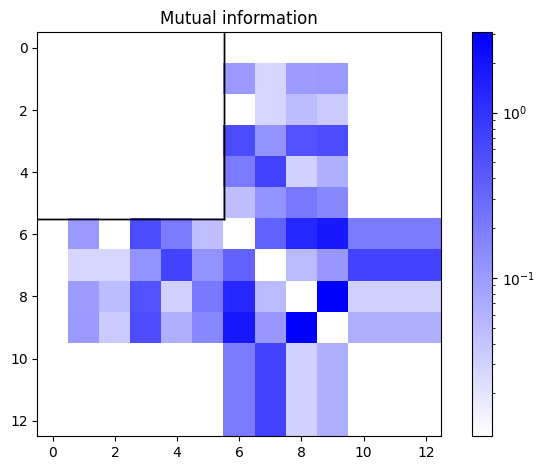

In [ ]:
momo.plot(result="MI", label=False, value_in_cell=False )

## <font color='green'> [2.2] Sampling </font> 

### <font color='white'> [2.2.0] Let's create an exemple </font> 

In [ ]:
momo.read_SBML()

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction
0 error detected in your SBML file


In [ ]:
momo.enzymes.add_to_all_reaction()
momo.parameters.add_externals()
momo.parameters.add_enzymes()

In [ ]:
momo.elasticity.half_satured()

In [ ]:
print(f"Shape of the stoichio matrix : {momo.Stoichio_matrix.shape} \n")
print(f"numbers of metabolite in the model : {momo.metabolites.len} \n")
print(f"Numbers of reaction in the model : {momo.reactions.len} \n")
print(f"Numbers of enzyme in the model : {momo.enzymes.df.shape[0]} \n")
print(f"Numbers of parameters in the model : {momo.parameters.df.shape[0]} \n")

Shape of the stoichio matrix : (40, 31) 

numbers of metabolite in the model : 40 

Numbers of reaction in the model : 31 

Numbers of enzyme in the model : 31 

Numbers of parameters in the model : 44 



### <font color='white'> [2.2.1] Updating the dataframe of the sampling data </font> 

In [ ]:
momo.data_sampling

,Name,Type,Mean,Standard deviation,Distribution


In [ ]:
momo.add_sampling_data(["PTS_RPTSsy","enzyme_PTS_RPTSsy_para"], "elasticity_p", mean = True)

momo.data_sampling

,Name,Type,Mean,Standard deviation,Distribution
0,"[PTS_RPTSsy, enzyme_PTS_RPTSsy_para]",elasticity_p,1.0,1,uniform


### <font color='white'> [2.2.2] Launching the sampling loop </font> 

In [ ]:
momo.sampling(10, result="rho", seed_constant=False)

running tiem of the code : 0.4401824474334717 
So 0.04401824474334717 per occurences !


array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ..., -0.00886832,
        -0.02173478, -0.00151521],
       [ 0.        ,  0.        ,  1.        , ..., -0.0269042 ,
        -0.01095692,  0.01758021],
       ...,
       [ 0.        , -0.00886832, -0.0269042 , ...,  1.        ,
        -0.8564132 , -0.48868603],
       [ 0.        , -0.02173478, -0.01095692, ..., -0.8564132 ,
         1.        ,  0.78171871],
       [ 0.        , -0.00151521,  0.01758021, ..., -0.48868603,
         0.78171871,  1.        ]])

In [ ]:
momo.MI([["enzyme_PTS_RPTSsy_para","enzyme_PGI_R02740_para"],["FUM_R01082","MDH_R00342"],["PPC_R00345"]])

,0,1,2
0,inf,NaN,0.000428
1,-inf,NaN,-inf
2,0.000428,NaN,inf


In [ ]:
from main import *
momo = model()
momo.read_SBML()

momo.elasticity.half_satured()
momo.enzymes.add_to_all_reaction()
momo.parameters.add_enzymes()
momo.parameters.add_externals()

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction
Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction
0 error detected in your SBML file


In [ ]:
a = momo.MI()

print(a.index[59])
a.loc[a.index[59]]

H2O


Temperature               0.0
enzyme_PTS_RPTSsy_para    0.0
enzyme_PGI_R02740_para    0.0
enzyme_PFK_R04779_para    0.0
enzyme_ALD_R01070_para    0.0
                         ... 
FUM_R01082                0.0
MDH_R00342                0.0
PPC_R00345                0.0
Overflow                  0.0
OxAConsumption            0.0
Name: H2O, Length: 115, dtype: float64

In [ ]:
momo.MI()

,Temperature,enzyme_PTS_RPTSsy_para,enzyme_PGI_R02740_para,enzyme_PFK_R04779_para,enzyme_ALD_R01070_para,enzyme_TIM_R01015_para,enzyme_GAP_R01061_para,enzyme_PGK_R01512_para,enzyme_PGM_R01518_para,enzyme_PGH_R00658_para,...,ACN_R01900,ICD_R00709,KGD_R08549,SCS_R00405,SDH_R02164,FUM_R01082,MDH_R00342,PPC_R00345,Overflow,OxAConsumption
Temperature,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
enzyme_PTS_RPTSsy_para,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000314,0.000314,0.000314,0.000314,0.000314,0.000314,0.000314,0.000227,0.001365,0.000007
enzyme_PGI_R02740_para,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000048,0.000048,0.000048,0.000048,0.000048,0.000048,0.000048,0.000201,0.000323,0.000059
enzyme_PFK_R04779_para,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.006491,0.006491,0.006491,0.006491,0.006491,0.006491,0.006491,0.007881,0.003399,0.000089
enzyme_ALD_R01070_para,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010153,0.010153,0.010153,0.010153,0.010153,0.010153,0.010153,0.021687,0.005936,0.002409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FUM_R01082,0.0,0.000314,0.000048,0.006491,0.010153,0.004805,0.010494,0.020952,0.034363,0.053396,...,NaN,26.031941,25.531941,NaN,NaN,0.000000,0.000000,0.247594,0.008985,0.181311
MDH_R00342,0.0,0.000314,0.000048,0.006491,0.010153,0.004805,0.010494,0.020952,0.034363,0.053396,...,NaN,NaN,25.531941,26.031941,0.000000,0.000000,0.000000,0.247594,0.008985,0.181311
PPC_R00345,0.0,0.000227,0.000201,0.007881,0.021687,0.008863,0.024375,0.047349,0.048975,0.059385,...,0.247594,0.247594,0.247594,0.247594,0.247594,0.247594,0.247594,0.000000,0.955642,0.196869
Overflow,0.0,0.001365,0.000323,0.003399,0.005936,0.001599,0.015930,0.035757,0.048001,0.058109,...,0.008985,0.008985,0.008985,0.008985,0.008985,0.008985,0.008985,0.955642,0.000000,0.681656


In [ ]:
momo.parameters.df.shape[0]

44

In [ ]:
momo.parameters.remove("Temperature")

Nom du paramètre retiré : Temperature


In [ ]:
momo.elasticity.p.shape[1]

43

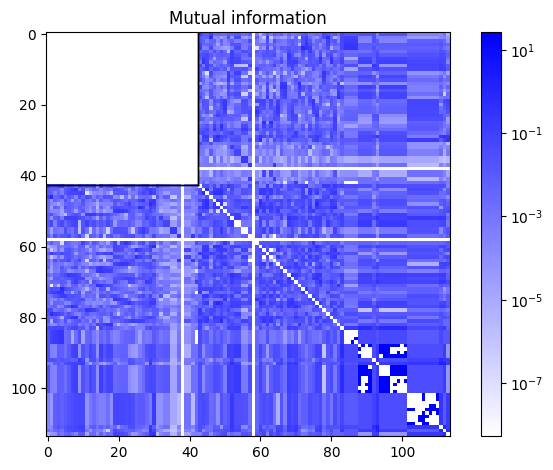

In [ ]:
momo.plot(result='MI')

In [ ]:
a = momo.MI()

a.columns[58]

'H2O'

In [ ]:
momo.elasticity.s.df
momo.elasticity.s.half_satured()
momo.elasticity.s.df

""


In [ ]:
a = pd.DataFrame()
a.columns.shape[0]

0